# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Keras/TF A2C DDPG agent

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from agents.keras_agent import Agent
from task import Hover, Task

init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Hover(runtime=5., init_pose=init_pose, target_pos=target_pos)
agent = Agent(task) 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


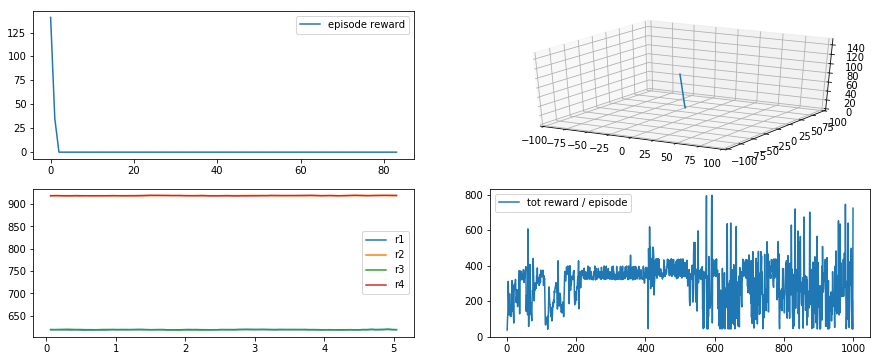

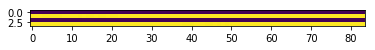

Episode = 1000, score =   2.096,1.76e+02 (best = 797.601 , worst =  38.554)


In [3]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
%matplotlib inline

num_episodes = 1000

worst_score = 100000.
best_score = -100000.

reward_labels = ['episode', 'avg_reward', 'tot_reward']
reward_results = {x : [] for x in reward_labels}

for i_episode in range(1, num_episodes+1):
    ep_score = 0

    state = agent.reset_episode()
    
    pose_bucket = {'x':[],'y':[],'z':[]}
    rotor = {'time':[],'1':[],'2':[],'3':[],'4':[]}
    rewards = []
    
    
    while True:
        action = agent.act(state) 
        #action = agent.random_action()
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        ep_score += reward
        best_score = max(best_score , ep_score)
        worst_score = min(worst_score , ep_score)
        x,y,z = task.sim.pose[:3]
        pose_bucket['x'].append(x)
        pose_bucket['y'].append(y)
        pose_bucket['z'].append(z)
        rewards.append(reward)
        rotor['time'].append(task.sim.time)
        rotor['1'].append(action[0])
        rotor['2'].append(action[1])
        rotor['3'].append(action[2])
        rotor['4'].append(action[3])
        
        if done:
            clear_output(wait=True)
            f = plt.figure(figsize=(15,6))
            ax1 = f.add_subplot(2, 2, 1)
            ax1.plot(rewards, label='episode reward')
            ax1.legend()
            ax2 = f.add_subplot(2,2,2,projection='3d')
            ax2.plot(pose_bucket['x'], pose_bucket['y'], pose_bucket['z'], label='quadraview')
            ax2.set_zlim3d(0, 150)
            ax2.set_xlim3d(-100, 100)
            ax2.set_ylim3d(-100, 100)
            
            ax3 = f.add_subplot(2,2,3)
            ax3.plot(rotor['time'], rotor['1'], label='r1')
            ax3.plot(rotor['time'], rotor['2'], label='r2')
            ax3.plot(rotor['time'], rotor['3'], label='r3')
            ax3.plot(rotor['time'], rotor['4'], label='r4')
            ax3.legend()
            
            ax4 = f.add_subplot(2,2,4)
            ax4.plot(reward_results['episode'], reward_results['tot_reward'], label='tot reward / episode')
            ax4.legend()

            plt.show()

            plt.imshow(np.array([rotor['1'],rotor['2'],rotor['3'],rotor['4']]))
            plt.show()
            avg_score = ep_score / len(rewards)
            print("Episode = {:4d}, score = {:7.3f},{:7.3} (best = {:7.3f} , worst = {:7.3f})".format(
               i_episode, avg_score, ep_score, best_score, worst_score), end="\n")

            break
    reward_results['episode'].append(i_episode)
    reward_results['avg_reward'].append(ep_score/len(rewards))
    reward_results['tot_reward'].append(ep_score)
    sys.stdout.flush()

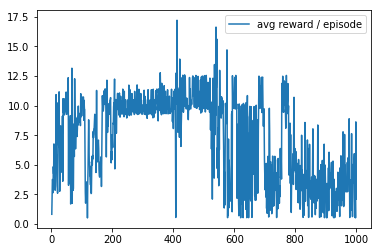

In [4]:
plt.plot(reward_results['episode'], reward_results['avg_reward'], label='avg reward / episode')
plt.legend()
plt.show()

## Pytorch A2C DDPG agent with binary transcoder for actions (ongoing lab)

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
from agents.torch_agent import Agent
from task import Hover

hparams = {
    'EPISODES'       : 350,
    'EP_MAX_RUNTIME' : 20.,
    'SEED'           : 1,
    'USE_CUDA'       : False,
    # deep nn
    'ACTOR_LR'    : 0.001, # adjustment per backprop
    'CRITIC_LR'   : 0.001, # adjustment per backprop
    'INIT_W'      : .025, # init weight distribution size
    'HIDDEN1'     : 8, 
    'HIDDEN2'     : 128,
#    'ACTOR_L2_RR' : 0.01, # L2/ridge regularization
#    'CRITIC_L2_RR': 0.01, # L2/ridge regularization
    'TAU'         : 0.005, # The factor of convergence for target nets
    'DROPOUT'     : 0.25, # Neuron dropout-factor (not implemented atm)
    
    # Ornstein-Uhlenbeck Exploration
    'OU_MU'    : 0.0,   # noise overall offset
    'OU_THETA' : .015,  # how “fast” the variable reverts towards to the mean
    'OU_SIGMA' : .6, # scale factor
    'OU_DECAY' : 1.5, # zero to disable OU
    
    # Q-learning
    'DISCOUNT' : .99,  # value discount factor

    # Instead of pixels we use a batch of environmental data / states 
    # (experiences), that we feed to our deep neural networks
    'EXP_BUFFER_SIZE' : 1000000,
    'EXP_BATCH_SIZE' : 20 # 
}
# create a decay
if hparams['OU_DECAY'] != 0:
    hparams['OU_DECAY'] = 1 / ( hparams['EPISODES'] * hparams['OU_DECAY'] )

#hparams = namedtuple("HyperParams",hparams)

init_pose = np.array([100., 100., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
#task = Task(runtime=2.5, target_pos=target_pos)
task = Hover(runtime=hparams['EP_MAX_RUNTIME'], init_pose=init_pose, target_pos=target_pos)
agent = Agent(task, hparams) 
print(agent.actor)
print(agent.critic)

In [ ]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from torchvision import transforms
%matplotlib inline

num_episodes = hparams['EPISODES']

worst_score = 100000.
best_score = -100000.

reward_labels = ['episode', 'avg_reward', 'tot_reward']
reward_results = {x : [] for x in reward_labels}

starting_positions = [
    [10., 10., 80.],
    [-10., -10., 140.]
]

tensor_to_image = transforms.Compose([
  transforms.ToPILImage()  
])

loss = {'aloss':[],'ploss':[]}
for i_episode in range(1, num_episodes+1):
    ep_score = 0
    #x = np.random.uniform(-2.,2.)
    #y = np.random.uniform(-2.,2.)
    #z = np.random.uniform(98.,102.)
    #i = random.sample(starting_positions,len(starting_positions)-1)
    #pos = starting_positions[i_episode%2]
    #state = agent.reset([pos[0], pos[1], pos[2], 0., 0., 0.])
    #state = agent.reset_episode(starting_positions[i_episode%2])
    state = agent.reset()
    
    pose_bucket = {'x':[],'y':[],'z':[]}
    rotor = {'time':[],'1':[],'2':[],'3':[],'4':[]}
    rewards = []
    
    
    while True:
        action = agent.act(state, i_episode) 
        #action = agent.random_action()
        next_state, reward, done = task.step(action)
        aloss,ploss = agent.step(action, reward, next_state, done)
        if aloss != None and ploss != None:
            loss['aloss'].append(aloss)
            loss['ploss'].append(ploss)
        state = next_state
        ep_score += 0.0+reward
        best_score = max(best_score , ep_score)
        worst_score = min(worst_score , ep_score)
        x,y,z = task.sim.pose[:3]
        pose_bucket['x'].append(x)
        pose_bucket['y'].append(y)
        pose_bucket['z'].append(z)
        rewards.append(reward)
        rotor['time'].append(task.sim.time)
        rotor['1'].append(action[0])
        rotor['2'].append(action[1])
        rotor['3'].append(action[2])
        rotor['4'].append(action[3])
        
        if done:
            clear_output(wait=True)
            f = plt.figure(figsize=(15,6))
            ax1 = f.add_subplot(2, 2, 1)
            #plt.tight_layout()
            ax1.plot(rewards)
            #ax = fig.gca(projection='3d')
            ax2 = f.add_subplot(2,2,2,projection='3d')
            ax2.plot(pose_bucket['x'], pose_bucket['y'], pose_bucket['z'], label='quadraview')
            ax2.set_zlim3d(0, 300)
            ax2.set_xlim(-300, 300)
            ax2.set_ylim(-300, 300)
            
            ax3 = f.add_subplot(2,2,3)
            ax3.plot(rotor['time'], rotor['1'], label='r1')
            ax3.plot(rotor['time'], rotor['2'], label='r2')
            ax3.plot(rotor['time'], rotor['3'], label='r3')
            ax3.plot(rotor['time'], rotor['4'], label='r4')
            
            ax4 = f.add_subplot(2,2,4)
            ax4.plot(reward_results['episode'], reward_results['tot_reward'], label='tot reward / episode')
            ax4.legend()
            plt.show()
            #ax.quiver(pose_bucket['x'], pose_bucket['y'], pose_bucket['z'], 0.0, 0.0, 0.0, label='quadraview')
            plt.imshow(agent.actor_target.fc1.weight.detach().numpy())
            plt.show()
            #plt.imshow(agent.actor_target.fc2.weight.detach().numpy())
            #plt.show()
            #plt.imshow(agent.actor_target.fc3.weight.detach().numpy())
            #plt.show()
            plt.imshow(np.array([rotor['1'],rotor['2'],rotor['3'],rotor['4']]))
            plt.show()
            avg_score = ep_score / len(rewards)
            print("Episode = {:4d}, score = {:7.3f},{:7.3} (best = {:7.3f} , worst = {:7.3f})".format(
               i_episode, avg_score, ep_score, best_score, worst_score), end="\n")

            break
    reward_results['episode'].append(i_episode)
    reward_results['avg_reward'].append(ep_score/len(rewards))
    reward_results['tot_reward'].append(ep_score)
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

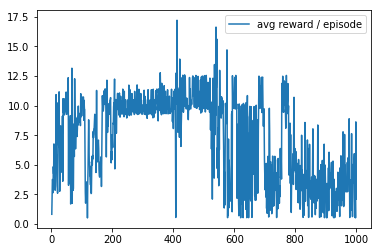

In [13]:
plt.plot(reward_results['episode'], reward_results['avg_reward'], label='avg reward / episode')
plt.legend()
plt.show()

In [15]:
np.mean(reward_results['avg_reward'][:10])

4.025338956030464

In [17]:
np.mean(reward_results['avg_reward'][250:400])

10.037963673304255

In [16]:
np.mean(reward_results['avg_reward'][-10:])

3.508536974852254

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:<br>
This last itteration I reintroducd velocity as a penalty factor and instead of giving it negative reward I capped low/high rotation speeds.<br>
Here I just set a base reward of 100 and used distance * velocity as penalty.<br>
I also reintroduced regularizer for both activation and init in the hidden layers of both actor and critincs nets.<br>
One problem is that I have a aggressive exploration scheme randomizing the mean of ou-process.<br>
One way to make this more stable is to reduce the exploration scale over time, as I do in my pytorch implementation.<br>
Another way is to short circuit traning when converged.<br>

This last run converged at around ep 200 but as I let it run to 1000 it later got knocked off the sweet spot found.<br>
In the output above you can clearly see that it converged with >100% increase in average reward over nore than a century episodes.<br>

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:<br> First I tried out AC3 but having trouble with multiprocessing (windows+jupyter) I gave that up in favor of DDPG. I ended up coding one in keras/tf but after I accidently deleted it I tried writing one in pytorch. I like the pytorch flow better and wanted to try it out.<br>
It whent pretty well, but I have the same problem as with my deleted one. It polarizes the continous output action space too much through the output activcation (tanh/sigmoid/softmax etc).<br>
I also copied together a new keras version, using hyperparams recomended by others to see if this my fault.<br>
Actually I see the same problem with my "supposed to work for others"- keras version, polarizing and flatlining the output at min or max.<br><br>
This is a clear reason why its easier to generate descrete actions, plus that I must have missed some fundemantal key here. :)<br>
Thats why I could'nt resist exploring an own idea letting the actor use its some what discrete output to generate bit patterns, which I then trancode to a some what grided constinous action space.<br>
Here I tested 8bits per real action, so instead of having 4 actions it now has 4x8 and then decode int to integers.<br>
I have not had that much of luck with this aproach yet but I guess the problem with why it never converges lays elsewhere.<br><br>

<b>Layers</b> tested have been two or three hidden with relu activation. The size varied but not over or near input size for first layer and then increasing and spreading towards the output.<br><br>
<b>Gamma/discount</b> Ive kept high at .99 as I use a continous model with randomly selected batches of experiences and neural nets in the "backend".<br><br>
As I use ActorCritic-models with a lengterm memory (target actor/critic) Ive played aroud with <b>learning rate</b> and <br>tau</br> (the short to longterm inertia factor). It mostly felt better setting local critic at one tenth of actor and then have tau at 0.005 to avoid having the "deep belief" of the world flipping around. :)<br>
Have'nt found any golden ratio here yet though and it dependes on some other factors like if I use dropouts, batchnorm etc.<br>
As part of this setup I use of experience memory, which resembles sleeping.<br>
I save experiences (states, actions, rewards) in a buffer and letting them randomly pop up in to memory through the a2c model. This is a common good practice in A2C/DDPG.<br><br>
Here we have minibatch-size and total memory as parameters and I have'nt found any particular good ratio here.<br>
Ive been experimenting with using both lower total memory, to let it naturaly forget older memories. But usualy I have it quite large at 1e6 or more. The <b>batchsize</b> is just to optimize the flow through the deep learning models.<br>
Ive also played around with sorting/prefering good memories when "dreaming", but it only tends to bias the model.<br><br>

Another important parameter is actually the <b>weight init</b>. But that also, at least for lower layers, is depending on the input data. And in later layers, regularization and output.<br>
That is, large space in the input data should have weights reflecting that space.<br>

Then for the exploration I used the comonly used ornstein-uhlenbeck process which is used to send some electricity through our agent.<br>I am costantly tempted to scale and multiply this to make the agent act with a larger random force. But its hard to find som good practice here. I left the scaling quite low and it should be enough depending on the normalization.<br>Also playing around with <b>mu</b> which is like the positive-negative mean bias of the process.<br>

With that said I havent settled on a final parameter structure. But here are some settings atm in the keras model:<br>

Actor Layers: 32,64,32 -> sigmoid<br>
Critic Layers: 32,64|32,64 -> relu<br>
Exploration: mu: random init (-100,100), theta:0.15, sigma:0.2<br>
gamma/discount: 0.99<br>
Adam lr actor: 0.001 (default)<br>
Tau: 0.05<br>
mem buffer, batch size: 32 / 1000000<br>


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:<br>
When it actualy converged it went like an aha moment.<br>
But for the moment I would say, not at all.<br>
The hovering task is hard, and Ive not managed to get it to converge well att all for some time now.<br>
Im stuck at a local minimum myself.<br>
Neither of my models seem to generate balanced continous actions.<br>
I plot the reward curve for every episode and most of the time it starts high but quickly settles in a worse local minimum.<br>
This last run converged at around ep 200 but as I let it run to 1000 it later got knocked off the sweet spot found.<br>
In the output above you can clearly see that it converged with >100% increase in average reward over nore than a century episodes.<br>
I also show this by printing early, intermediate and late mean average rewards of the run in the "Plot Rewards" section.

Looking at the output of an earlier run below it actually converged late around 790 of 1000 episodes, when it went from around 274 average reward to 284 in almost a go, giving it boost and convergance in total reward.<br>
This was just a random event as the next run did'nt converge at all. So when having a model playing on the edge its almost like in real life evolution of human genome, it might happen to flip an action and win the lottery. :)
![title](img/rl_model_reward.png)


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:<br>
Ive been playing around with this environment over many weeks now.<br>
Reading papers, watched videos, coding, tuning, testing, waiting, banging my head against the wall, laughing, enjoying.<br>
Eventhough Ive not found a good prameter balance for the hovering, building a model in both keras and pytorch has been very educational.<br>
One hughe part was to just understand all the parts, in this case of DDPG, and get a sens of how everything plays together.<br><br>
The hardest part is to give up on the hyper param juggling and understand why functions used and recomended does not work well for continous action spaces. Ive downloaded some of existing implementations and they did'nt seem to work well either.<br><br>
Ive have an interest in psychology and neuro science and the paralells are in many ways mind blowing.<br>
My first intuition abot getting it to hover was giving it highest score at target position, letting it of there, telling it to just "stay!". The problem was that I gave it the reward without it doing anything special. No mather what it did it just got negative reward when exploring. So it seemed to figured that it was best to just kill it self as quickly as possible to at least keep the total negative reward down. :)<br><br>
The reward function is the most interesting parameter and maybe there are some golden cherrys that Ive missed experimenting with there.<br>
There is a lot more to experiment with and develop here, maybe in the capstone.<br>
It would be cool to try out AC3 and LSTM/RNN in the loop.<br>
These weeks have been all in all an inspiring blast. :)

